In [3]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import networkx as nx
import rpy2 as rp
import rpy2.robjects as ro
import pyreadr
import os
import time
import h5py
# import mmdet
import scanpy
# import ssam
import pickle
import random
# import pyarrow
import dgl
import ast

from tqdm import tqdm

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, matthews_corrcoef, mean_squared_error

# from captum.attr import IntegratedGradients
# from captum.attr import LayerConductance
# from captum.attr import NeuronConductance

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

# import torch_geometric

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms, utils

from skimage import io
from skimage import img_as_float
from scipy import ndimage

# from ssam.utils import corr, calc_ctmap, calc_corrmap, flood_fill, calc_kde
from scipy.spatial.distance import cdist

from collections import OrderedDict

from packaging import version
import subprocess

In [4]:
torch.__version__

'2.0.1'

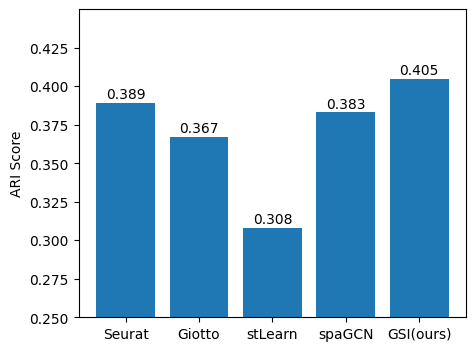

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
# plt.title('ARI score - 151673')
x=["Seurat","Giotto","stLearn","spaGCN",'GSI(ours)']
y = [0.389, 0.367, 0.308, 0.383, 0.405]
# colors = ['red','yellow','blue','purple','green']
for i, v in enumerate(y):
    plt.text(i, v + 0.001, str(v), ha='center', va='bottom')

y_ticks = np.arange(0.2,0.45,0.025)
plt.yticks(y_ticks)
plt.ylim(0.25,0.45)
ax.bar(x, y)
ax.set_ylabel('ARI Score')
# ax.legend(title = 'ARI score')
# import plotly.graph_objects as go
# fig_widget = go.FigureWidget(fig)
# fig_widget
plt.savefig('ARI score hd.png',dpi=300)
plt.show()

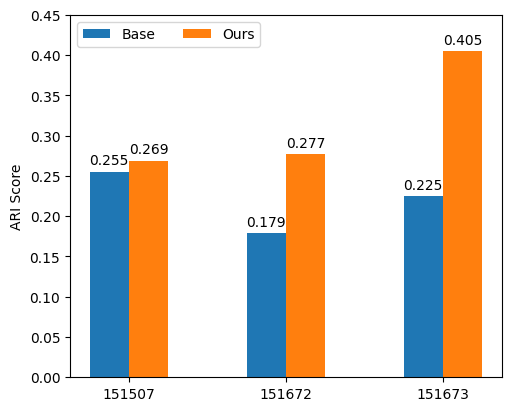

In [70]:
# fig, ax = plt.subplots()
# plt.title('ARI score - 151673')
x = ("151507", "151672", "151673")
values = {
    'Base' : (0.255, 0.179, 0.225),
    'Ours' : (0.269, 0.277, 0.405),
}
# heights = [0.255, 0.269, 0.179, 0.277, 0.225, 0.405]
# groups = ['Group 1', 'Group 1', 'Group 2', 'Group 2', 'Group 3', 'Group 3']

index = np.arange(len(x))
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(5,4))
for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(index + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('ARI Score')
# ax.set_title('Performance ')
ax.set_xticks(index + (0.5*width), x)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.45)

plt.savefig('Seurat_compare hd.png',dpi=300)
plt.show()

[98.90115135 54.95447268 28.1447302   7.72895661 44.4469496  47.28079698
  4.85220009 16.33244482 11.59507115 62.73916827 85.61820486 65.01024211
 99.07216848 47.03507484 61.82944836 28.26672065 97.60033158 67.30679991
 44.05308888 28.96873403 50.9699684  11.24608958 22.69547893 47.85523047
 24.27581568]


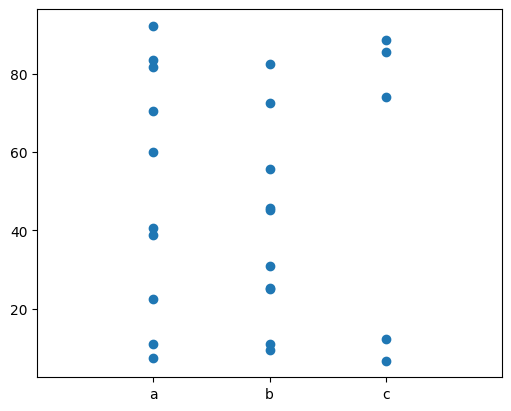

In [41]:
import matplotlib as mpl
np.random.seed(45)


lower_bound = 0
upper_bound = 100
num_cells_change = 5
matrix_size = (25,25)
random_matrix = lower_bound + (upper_bound - lower_bound) * np.random.rand(*matrix_size)
print(random_matrix[0])
random_matrix[0,:10] = 1
random_matrix[0,10:20] = 2
random_matrix[0,20:] = 3

# random_rows = np.random.choice(random_matrix.shape[0], num_cells_change, replace=False)
# random_cols = np.random.choice(random_matrix.shape[1], num_cells_change, replace=False)

# random_matrix[random_rows, random_cols] = 150
# random_matrix[:,0] = np.random.rand(15)
# random_matrix[:,1] = np.random.rand(15)

fig, ax = plt.subplots(layout='constrained', figsize=(5,4))
# plt.figure(figsize=(6,5))
ax.scatter(random_matrix[0], random_matrix[1])
# plt.axis('off')
# plt.setp(plt.gca().get_xticklabels(), visible=False)
# plt.setp(plt.gca().get_yticklabels(), visible=False)
ax.set_xlim(0, 4)
ax.set_xticks(np.arange(3)+1,('a','b','c'))  # Alternatively, you can use plt.xticks([], [])
# plt.yticks([])
# plt.colorbar()
# plt.title('Random heatmap')
# plt.savefig('25x15 Gene Matrix Red.png')
plt.show()

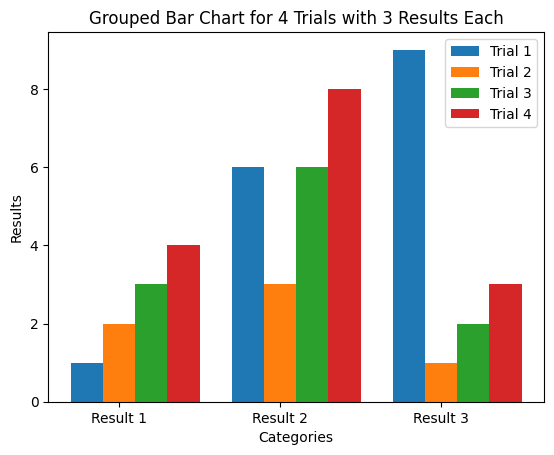

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
trials = ['Trial 1', 'Trial 2', 'Trial 3', 'Trial 4']
categories = ['Result 1', 'Result 2', 'Result 3']
data = np.random.randint(1, 10, size=(4, 3))  # Replace this with your actual data

# Plotting the grouped bar chart
bar_width = 0.2
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, data[0], width=bar_width, label='Trial 1')
plt.bar(r2, data[1], width=bar_width, label='Trial 2')
plt.bar(r3, data[2], width=bar_width, label='Trial 3')
plt.bar(r4, data[3], width=bar_width, label='Trial 4')

# Add labels, title, legend, etc.
plt.xlabel('Categories')
plt.ylabel('Results')
plt.title('Grouped Bar Chart for 4 Trials with 3 Results Each')
plt.xticks([r + bar_width for r in range(len(categories))], categories)
plt.legend()

# Show the plot
plt.show()

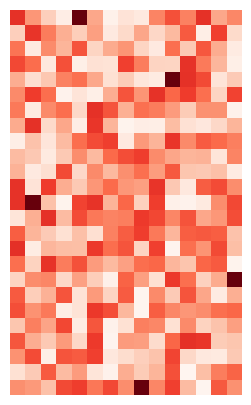

In [93]:
import matplotlib as mpl
np.random.seed(45)


lower_bound = 0
upper_bound = 100
num_cells_change = 5
matrix_size = (25,15)
random_matrix = lower_bound + (upper_bound - lower_bound) * np.random.rand(*matrix_size)

random_rows = np.random.choice(random_matrix.shape[0], num_cells_change, replace=False)
random_cols = np.random.choice(random_matrix.shape[1], num_cells_change, replace=False)

random_matrix[random_rows, random_cols] = 150
# random_matrix[:,0] = np.random.rand(15)
# random_matrix[:,1] = np.random.rand(15)

plt.figure(figsize=(6,5))
plt.imshow(random_matrix, cmap=mpl.colormaps['Reds'])
plt.axis('off')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xticks([])  # Alternatively, you can use plt.xticks([], [])
plt.yticks([])
# plt.colorbar()
# plt.title('Random heatmap')
plt.savefig('25x15 Gene Matrix Red.png')
plt.show()

In [68]:
import math
lower_bound = 0
upper_bound = 10000
matrix_size = (33538,2)
random_frame = lower_bound + (upper_bound - lower_bound) * np.random.rand(*matrix_size)
df = pd.DataFrame(random_frame)
df = df.round(0)
df = df.astype(int)
df.columns = ['x','y']
df

x     y
0      3221  6262
1      7476  6418
2      3150  3896
3      9236  9376
4      1522  6411
...     ...   ...
33533  9058  8767
33534   867  5923
33535  4367   271
33536  3347  4035
33537  3482  3350

[33538 rows x 2 columns]

<h3>Dataset batch preprocess</h3>

In [3]:
class TumorDatasetAll(Dataset):
    
    def __init__(self, instance , root_dir, transform=None):
        self.instance = instance
        # self.labels_frame = np.array(pd.read_csv(csv_file, skiprows=1, sep=',', header=None)).astype(int)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return self.instance.shape[-1]

    def __getitem__(self, idx):
        
        img = np.zeros(shape=(1, 270 , 220),dtype=np.double)
        img = self.instance[idx,...]
        
        # label = np.array([self.labels_frame[idx, 1]-1])
        train_sample = {'image': img}
        
        if self.transform:
            train_sample = self.transform(train_sample)
            
        return train_sample
    
class TumorDatasetTrain(Dataset):
    
    def __init__(self, instance , root_dir, transform=None):
        self.instance = instance
        # self.labels_frame = np.array(pd.read_csv(csv_file, skiprows=1, sep=',', header=None)).astype(int)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return self.instance.shape[-1]

    def __getitem__(self, idx):
        
        img = np.zeros(shape=(1, 270 , 220),dtype=np.double)
        img = self.instance[idx,...]
        
        # label = np.array([self.labels_frame[idx, 1]-1])
        train_sample = {'image': img}
        
        if self.transform:
            train_sample = self.transform(train_sample)
            
        return train_sample

class TumorDatasetTest(Dataset):
    
    def __init__(self, instance , root_dir, transform=None):
        self.instance = instance
        # self.labels_frame = np.array(pd.read_csv(csv_file, skiprows=1, sep=',', header=None)).astype(int)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return self.instance.shape[-1]

    def __getitem__(self, idx):
        
        img = np.zeros(shape=(1, 270 , 220),dtype=np.double)
        img = self.instance[idx, ...]
        
        # label = np.array([self.labels_frame[idx, 1]-1])
        test_sample = {'image': img }
        
        if self.transform:
            test_sample = self.transform(test_sample)
        return test_sample
    
class ToTensor(object):

    def __call__(self, sample):
        image = sample['image']
        return {'image': torch.from_numpy(image)}

In [4]:
mat_151507 = pyreadr.read_r('dataset/df_logcount_507.rds')
mat_151672 = pyreadr.read_r('dataset/df_logcount_672.rds')
mat_151673 = pyreadr.read_r('dataset/df_logcount_673.rds')
df_151507 = mat_151507[None]
df_151672 = mat_151672[None]
df_151673 = mat_151673[None]
combined_507_672 = pd.concat([df_151507,df_151672],axis=1)
combined_all = pd.concat([combined_507_672,df_151673],axis=1)

In [5]:
directory1 = 'dataset/datapoints/unfil_151507'
directory2 = 'dataset/datapoints/unfil_151672'
directory3 = 'dataset/datapoints/unfil_151673'
filenames1 = os.listdir(directory1)
filenames2 = os.listdir(directory2)
filenames3 = os.listdir(directory3)
filenames1[:3]

['ENSG00000242258.npy', 'ENSG00000277630.npy', 'ENSG00000138892.npy']

In [6]:
len(filenames2)

33538

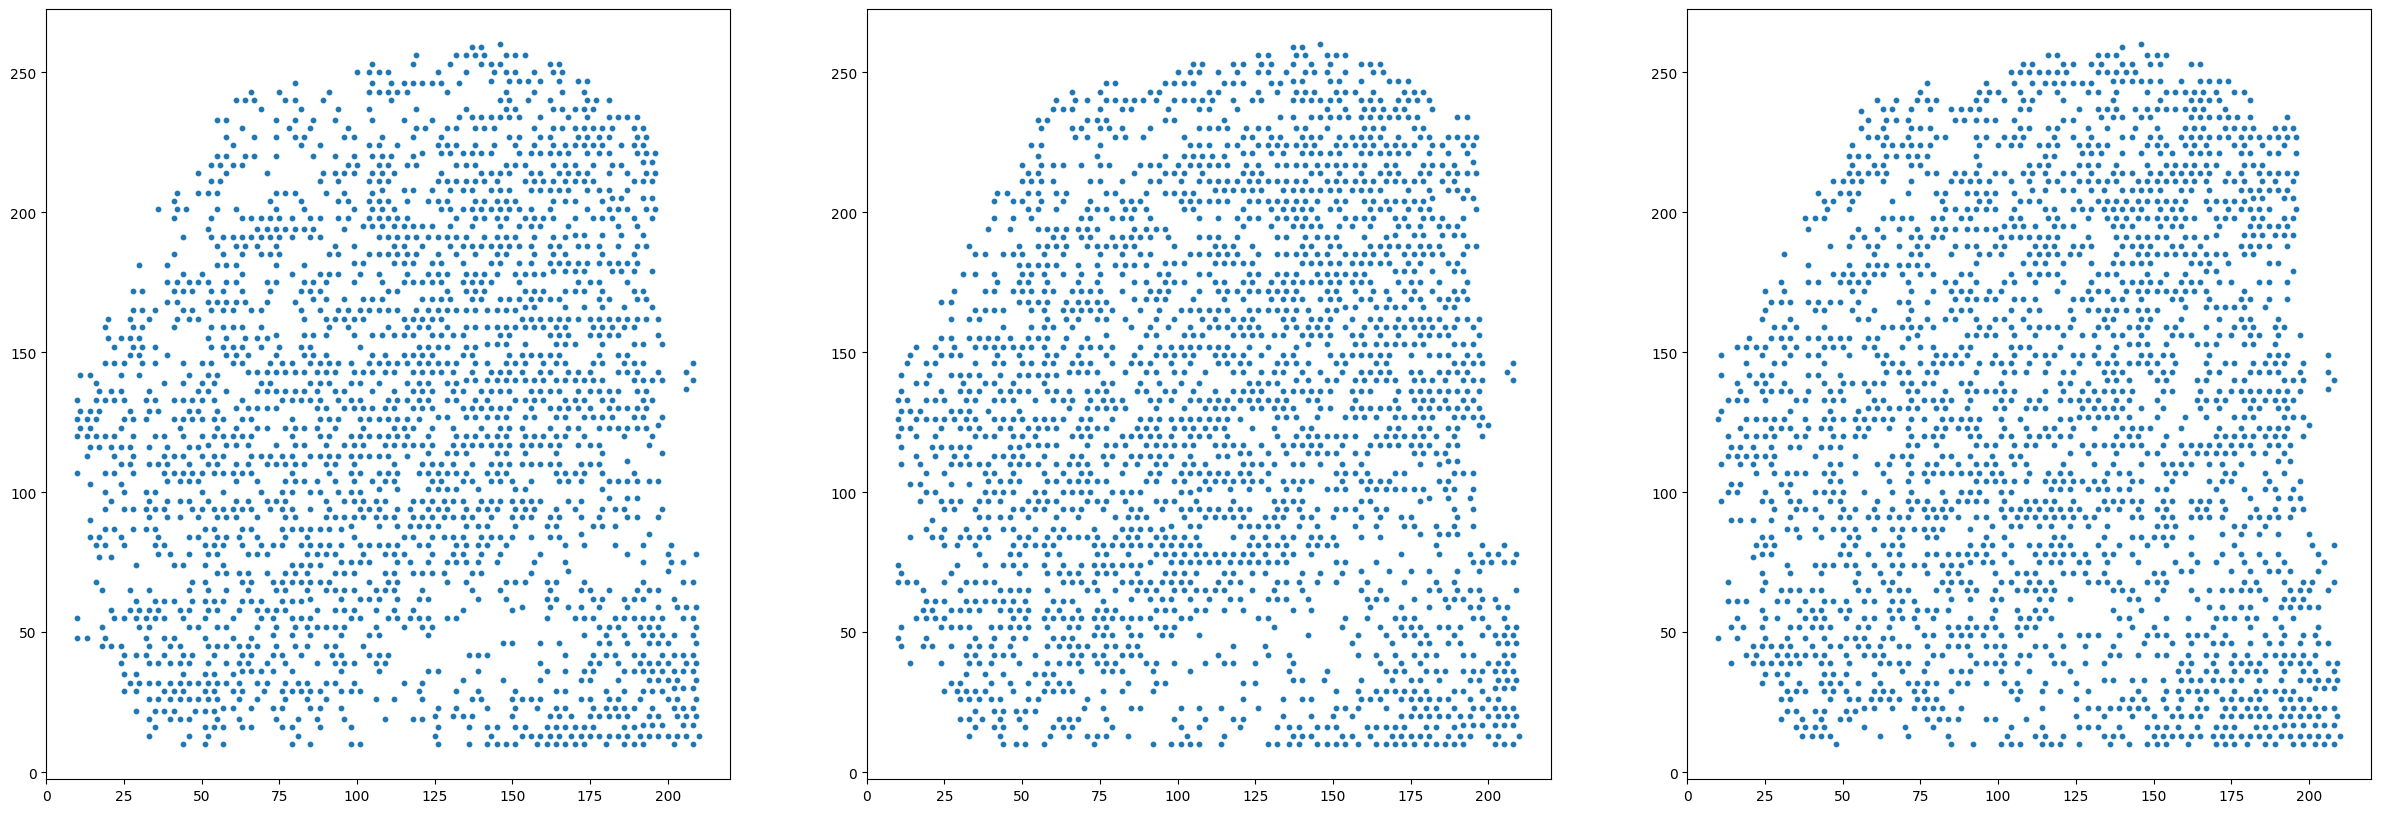

In [7]:
# plt.figure(figsize=(8,10))
count = 0
fig, ax = plt.subplots(1,3,figsize=(30, 10))

for i, filename in enumerate(filenames1) :
    if count == 3:
        break
    if filename.endswith('.npy') and os.path.isfile(os.path.join(directory1, filename)):
        new_test = np.load(directory1+'/'+filename)
        if new_test.sum() > 2000:
            coord = np.where(new_test>0)
            ax[count].scatter(coord[1],coord[0],s=10)
            count = count + 1
        else:
            continue
        # ax[i].imshow(new_test, cmap='viridis',origin='lower')

plt.show()

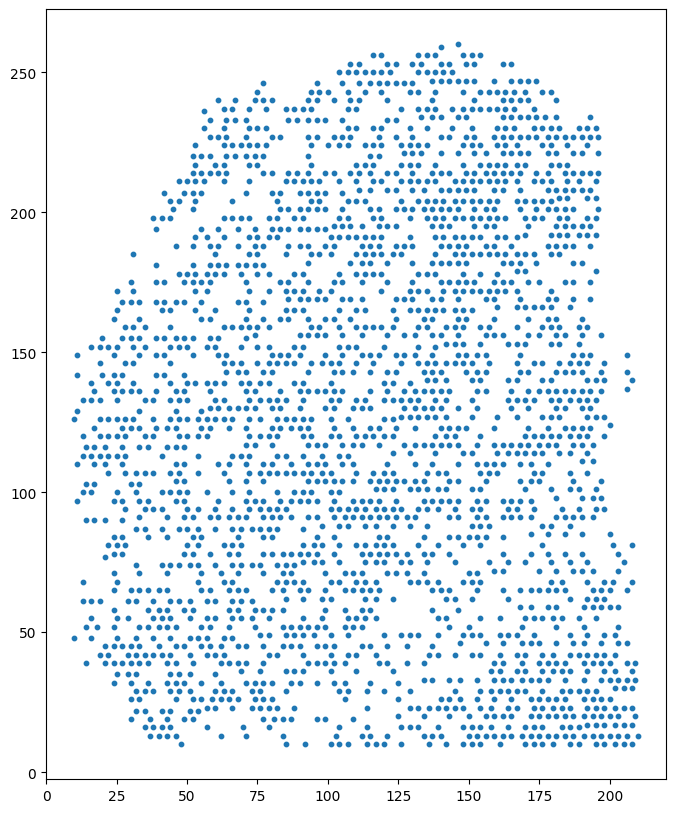

In [8]:
plt.figure(figsize=(8, 10))
plt.scatter(coord[1],coord[0],s=10)
# plt.savefig('image_matrix_507.png')

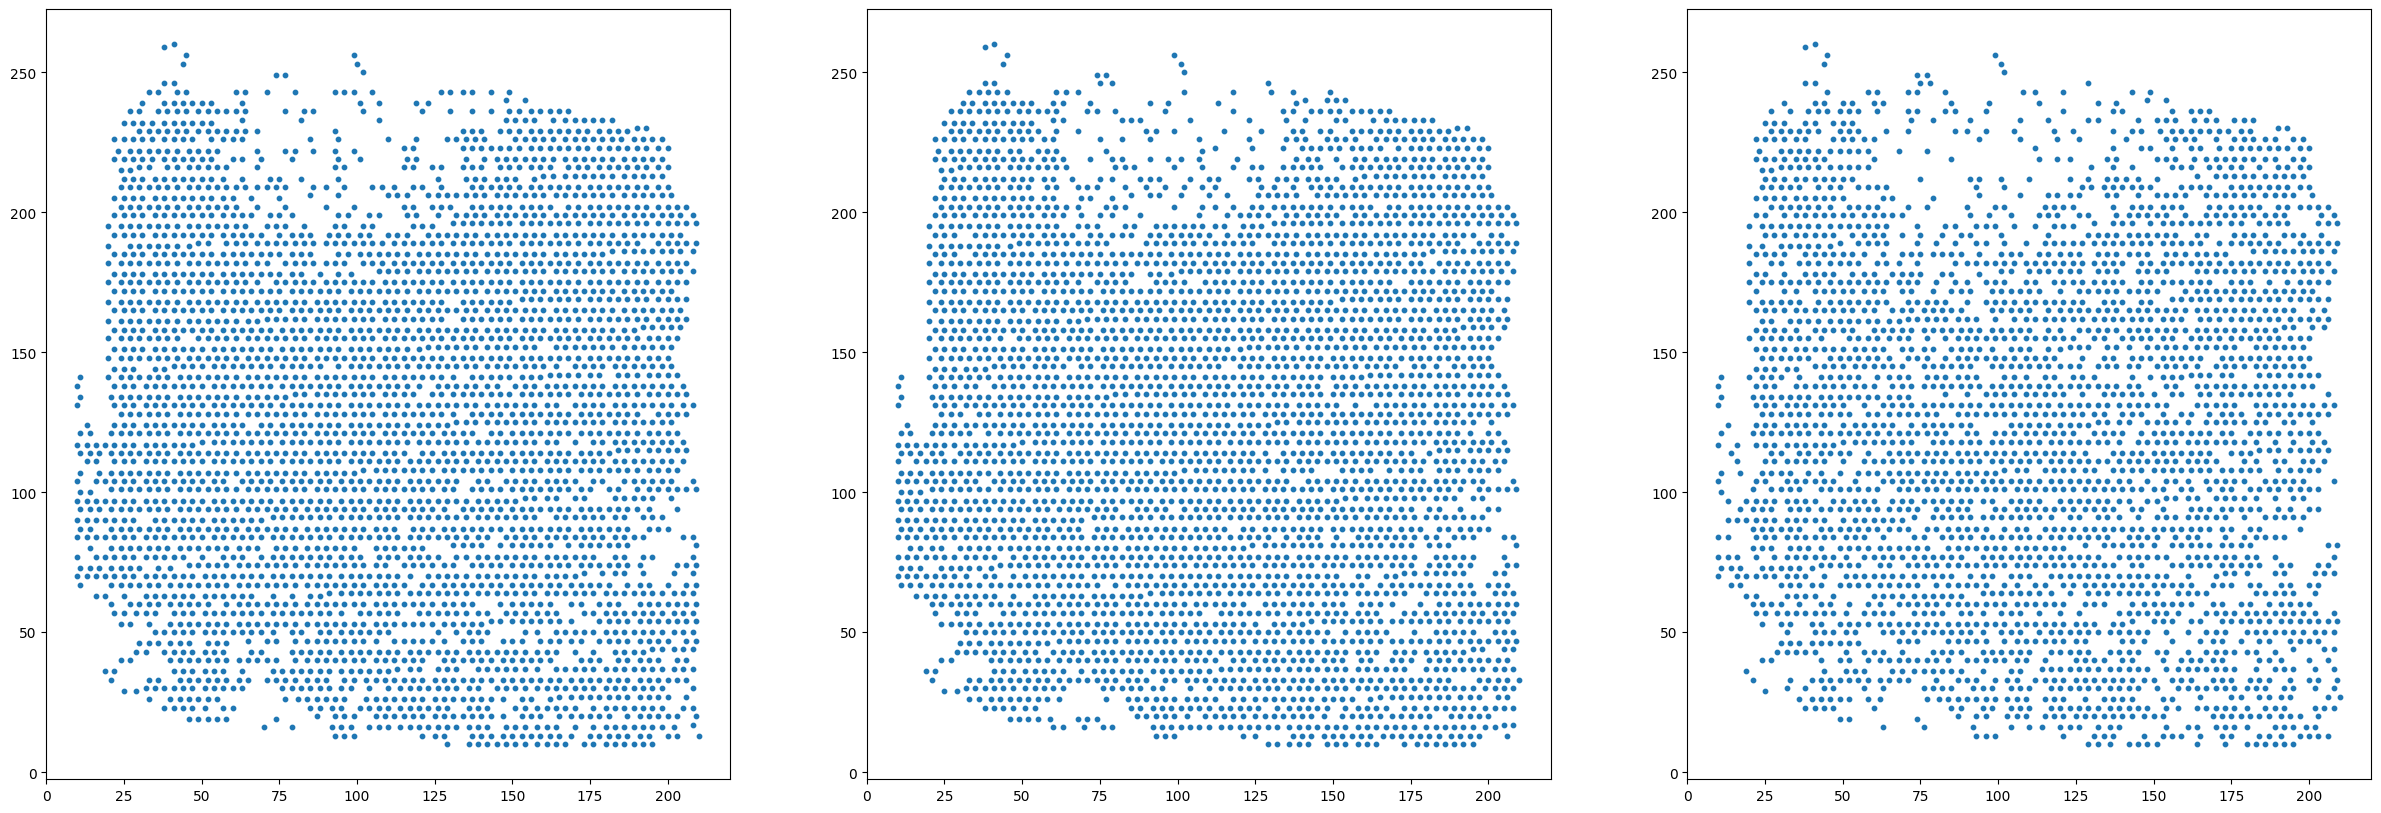

269


In [9]:
# plt.figure(figsize=(8,10))
count = 0
fig, ax = plt.subplots(1,3,figsize=(30, 10))
fil = filenames2
dir = directory2

for i, filename in enumerate(fil) :
    if filename.endswith('.npy') and os.path.isfile(os.path.join(dir, filename)):
        new_test = np.load(dir+'/'+filename)
        if new_test.sum() > 3000:
            coord = np.where(new_test>0)
            if count < 3:
                ax[count].scatter(coord[1],coord[0],s=10)
            count = count + 1
        else:
            continue
            # ax[i].imshow(new_test, cmap='viridis',origin='lower')

plt.show()
print(count)

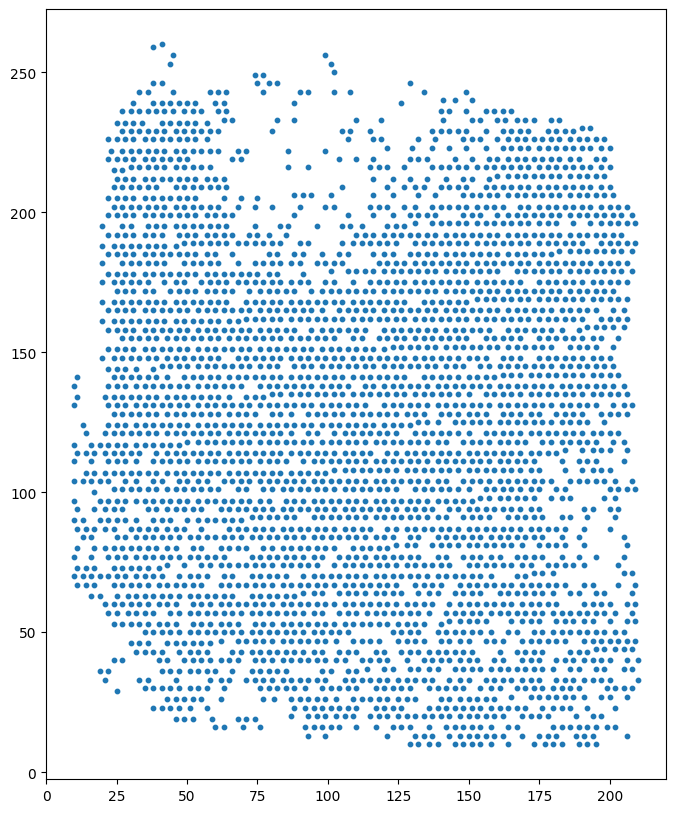

In [10]:
plt.figure(figsize=(8, 10))
plt.scatter(coord[1],coord[0],s=10)
# plt.savefig('image_matrix_672.png')

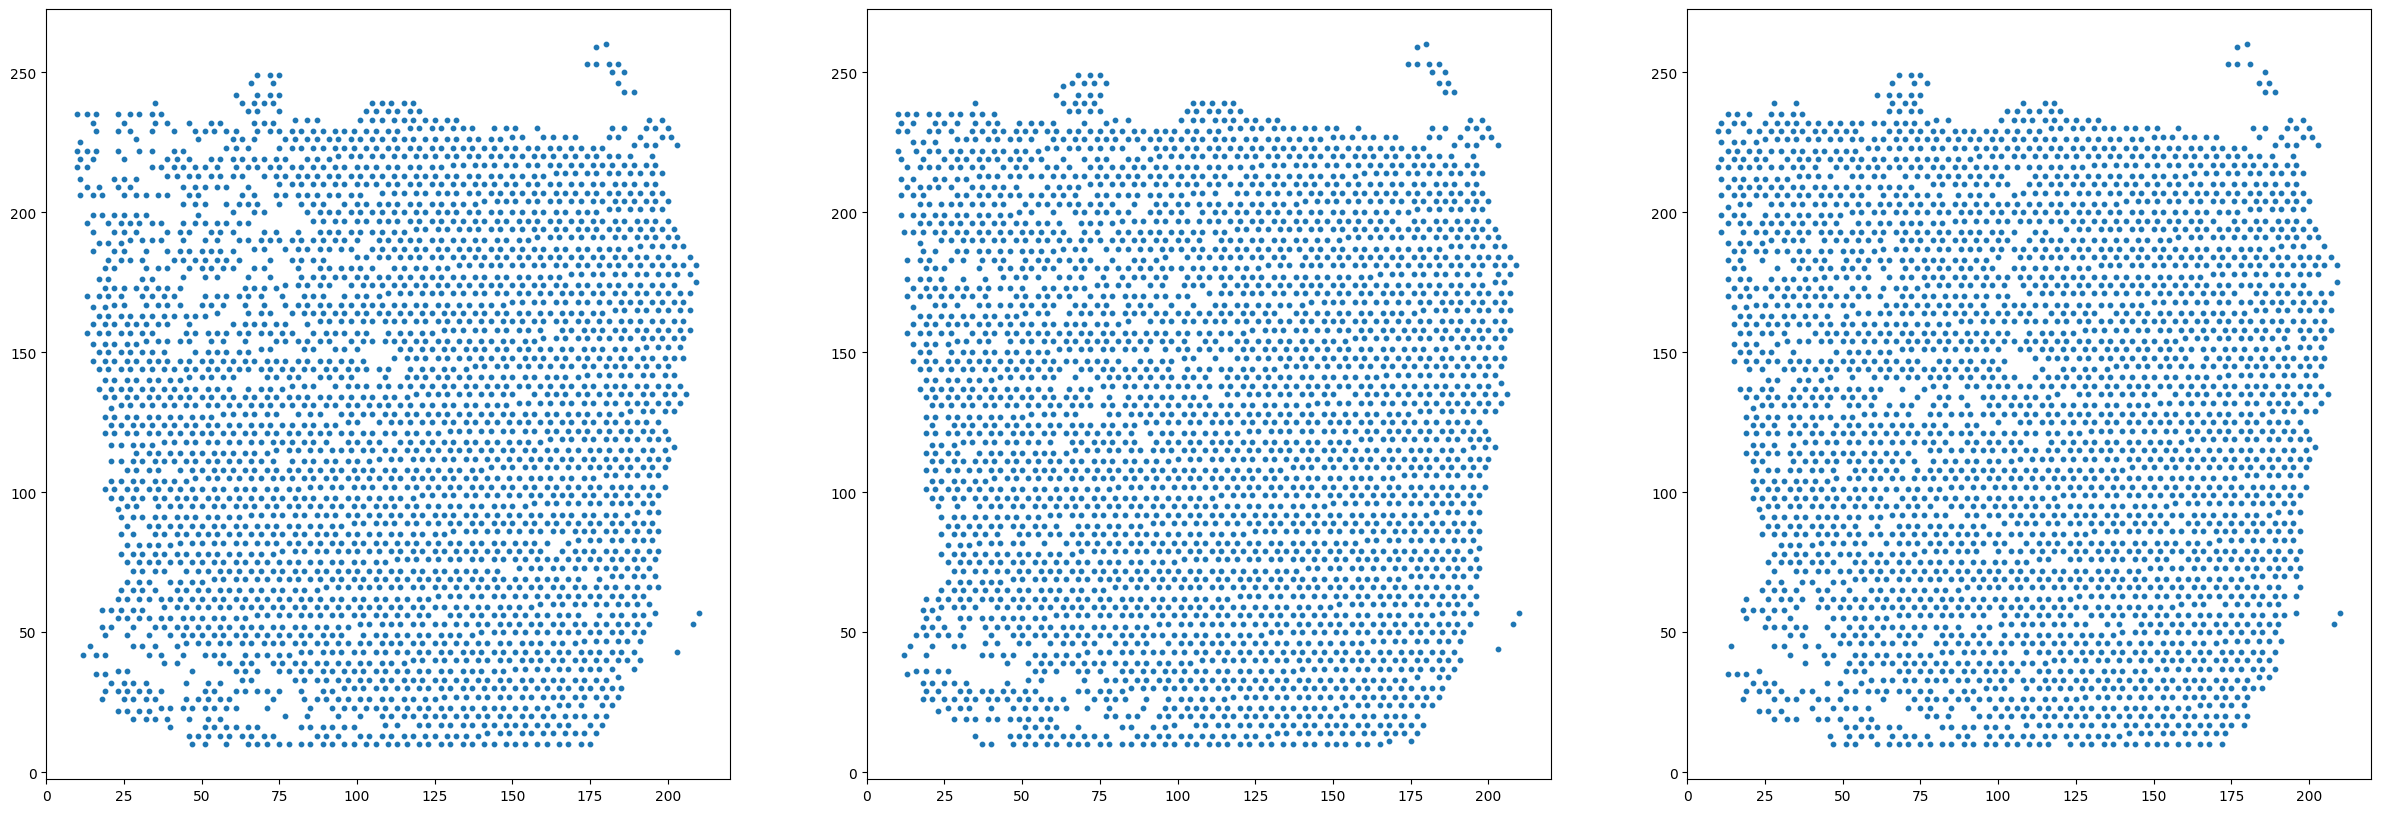

In [11]:
# plt.figure(figsize=(8,10))
count = 0
fig, ax = plt.subplots(1,3,figsize=(30, 10))
fil = filenames3
dir = directory3

for i, filename in enumerate(fil) :
    if count == 3:
        break
    if filename.endswith('.npy') and os.path.isfile(os.path.join(dir, filename)):
        new_test = np.load(dir+'/'+filename)
        if new_test.sum() > 3000:
            coord = np.where(new_test>0)
            ax[count].scatter(coord[1],coord[0],s=10)
            count = count + 1
        else:
            continue
        # ax[i].imshow(new_test, cmap='viridis',origin='lower')

plt.show()

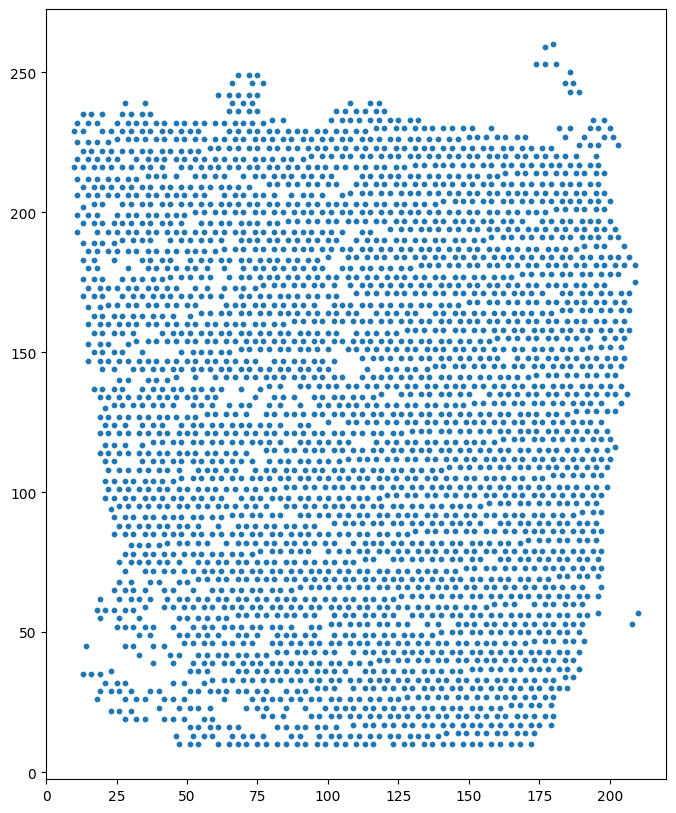

In [12]:
plt.figure(figsize=(8, 10))
plt.scatter(coord[1],coord[0],s=10)
# plt.savefig('image_matrix_673.png')

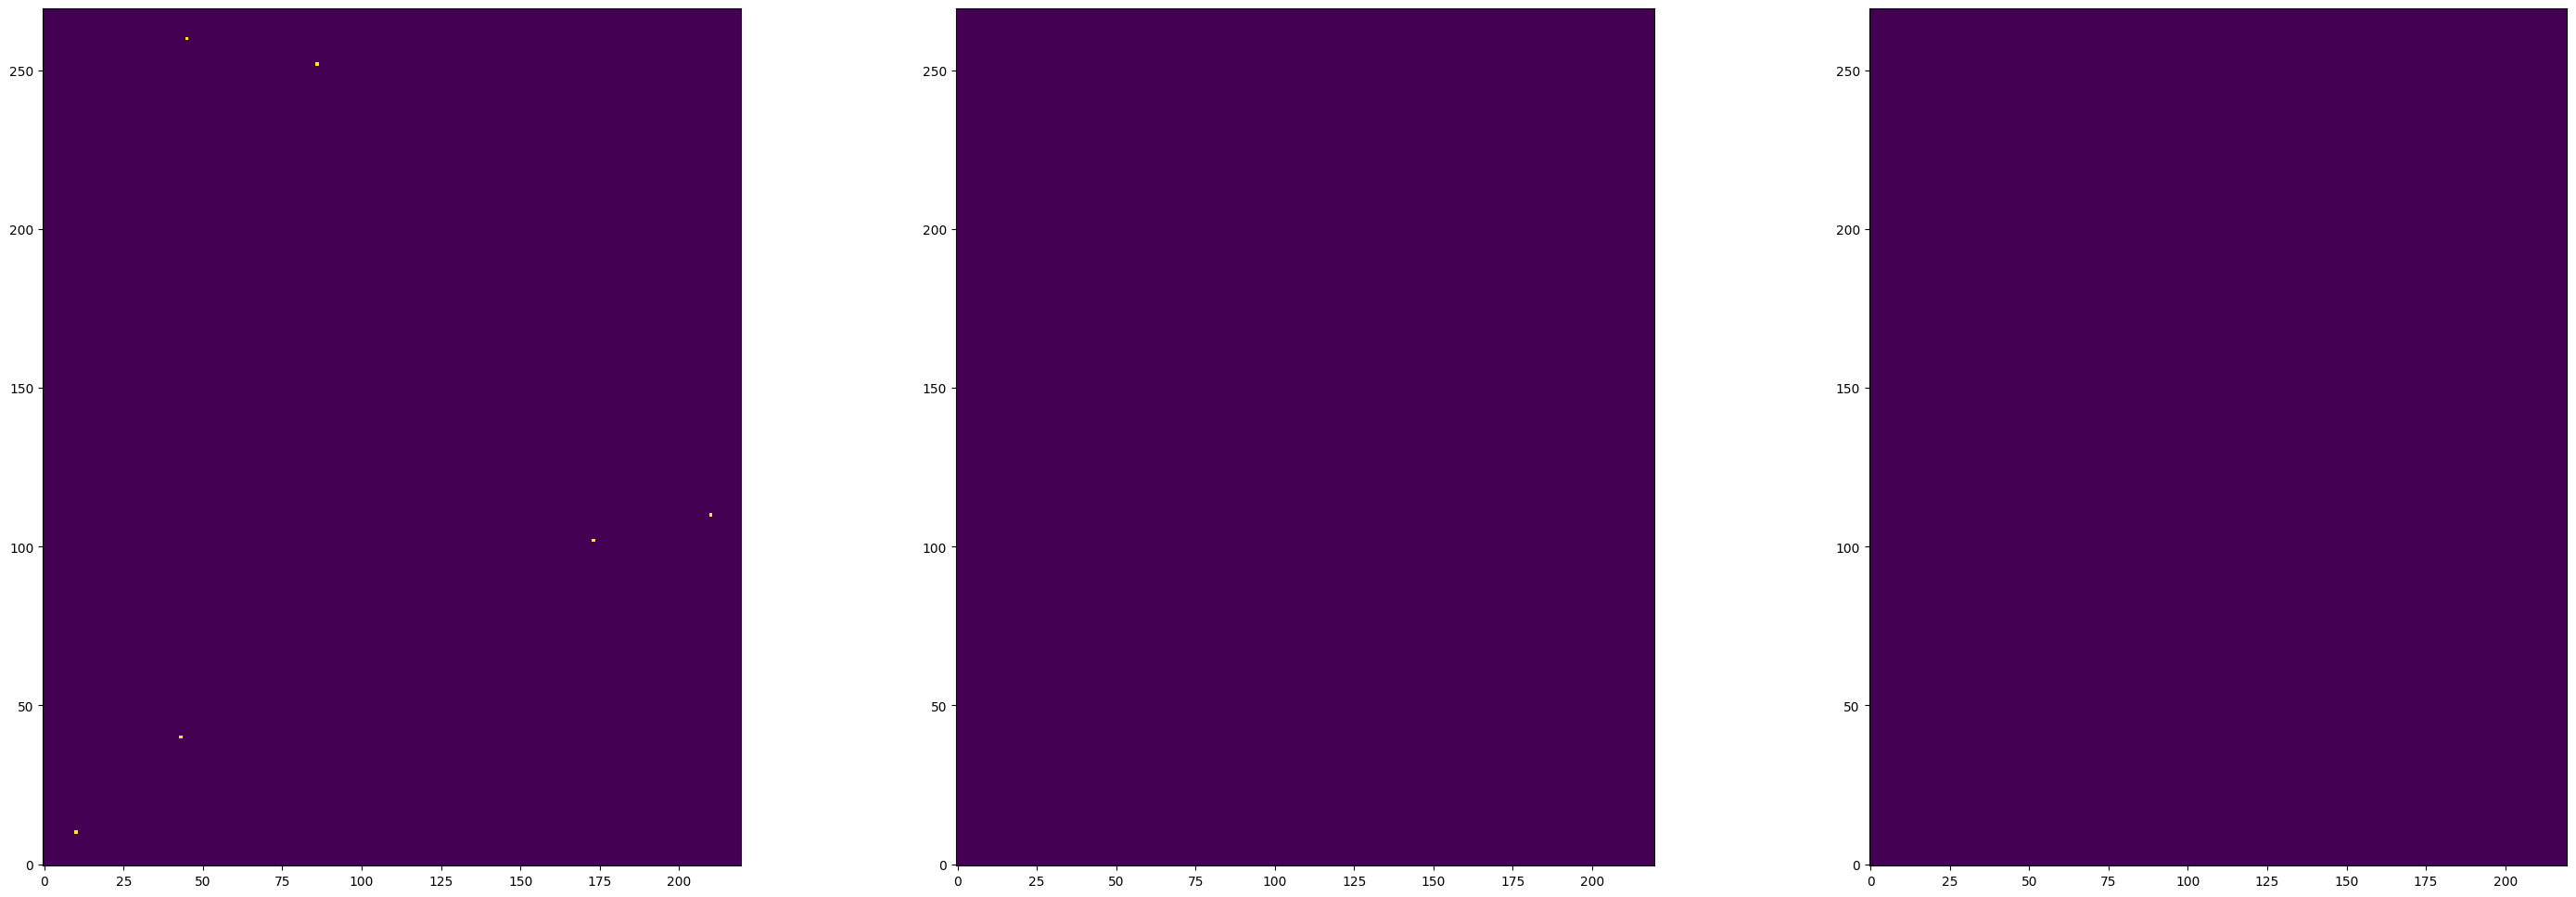

In [13]:
# load datapoints to tensor
# plt.figure(figsize=(8,10))

fig, ax = plt.subplots(1,3,figsize=(36,12))
for i, filename in enumerate(filenames3[:3]) :
    if filename.endswith('.npy') and os.path.isfile(os.path.join(directory3, filename)):
        new_test = np.load(directory3+'/'+filename)   
        ax[i].imshow(new_test, cmap='viridis',origin='lower')

plt.show()

In [14]:
# load datapoints to tensor
data_507 = []

for i, filename in enumerate(filenames1) :
    if filename.endswith('.npy') and os.path.isfile(os.path.join(directory1, filename)):
        new_test = np.load(directory1+'/'+filename)
        data_507.append(new_test)
data_507 = np.array(data_507)
data_507 = data_507[:,np.newaxis,:]
data_507.shape

(33538, 1, 270, 220)

In [15]:
# load datapoints to tensor
data_672 = []

for i, filename in enumerate(filenames2) :
    if filename.endswith('.npy') and os.path.isfile(os.path.join(directory2, filename)):
        new_test = np.load(directory2+'/'+filename)
        data_672.append(new_test)
data_672 = np.array(data_672)
data_672 = data_672[:,np.newaxis,:]
data_672.shape

(33538, 1, 270, 220)

In [16]:
# load datapoints to tensor
data_673 = []

for i, filename in enumerate(filenames3) :
    if filename.endswith('.npy') and os.path.isfile(os.path.join(directory3, filename)):
        new_test = np.load(directory3+'/'+filename)
        data_673.append(new_test)
data_673 = np.array(data_673)
data_673 = data_673[:,np.newaxis,:]
data_673.shape

(33538, 1, 270, 220)

In [17]:
dataset_all = np.concatenate((data_507, data_672, data_673))
dataset_all.shape

(100614, 1, 270, 220)

In [18]:
print(len(filenames1))
print(len(filenames2))
print(len(filenames3))

33538
33538
33538


In [19]:
combined_all.shape

(33538, 11880)

In [20]:
df_151507.shape

(33538, 4226)

In [21]:
dats = np.expand_dims(data_507[0],axis=0)
dats2 = data_507[:,np.newaxis,:]
print(dats.shape)
print(dats2.shape)

(1, 1, 270, 220)
(33538, 1, 1, 270, 220)


In [22]:
# dataset_all = dataset[:,np.newaxis,:]
# dataset_all.shape

In [23]:
BATCH = ['507']*len(filenames1) + ['672']*len(filenames2) + ['673']*len(filenames3)
BATCH = np.array(BATCH)
BATCH.shape

(100614,)

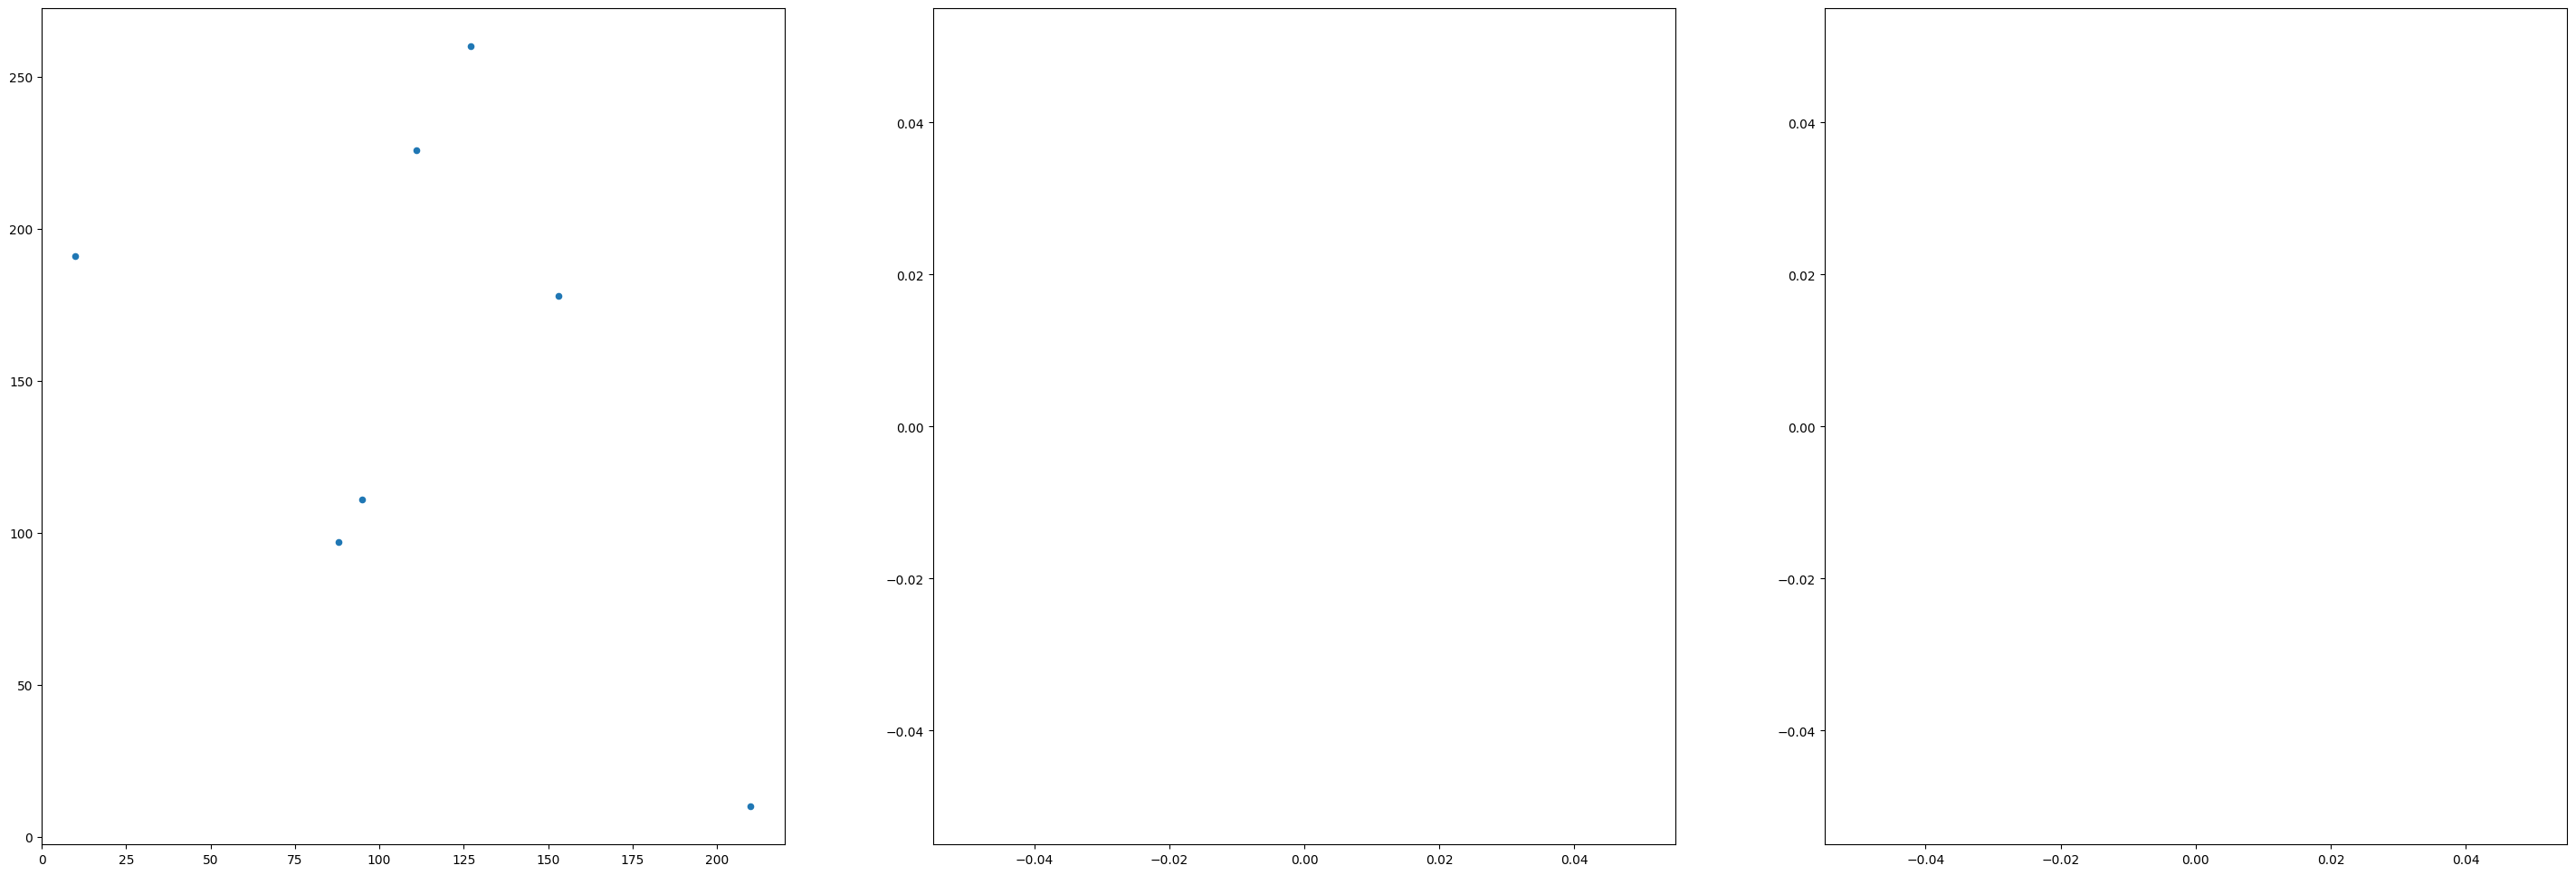

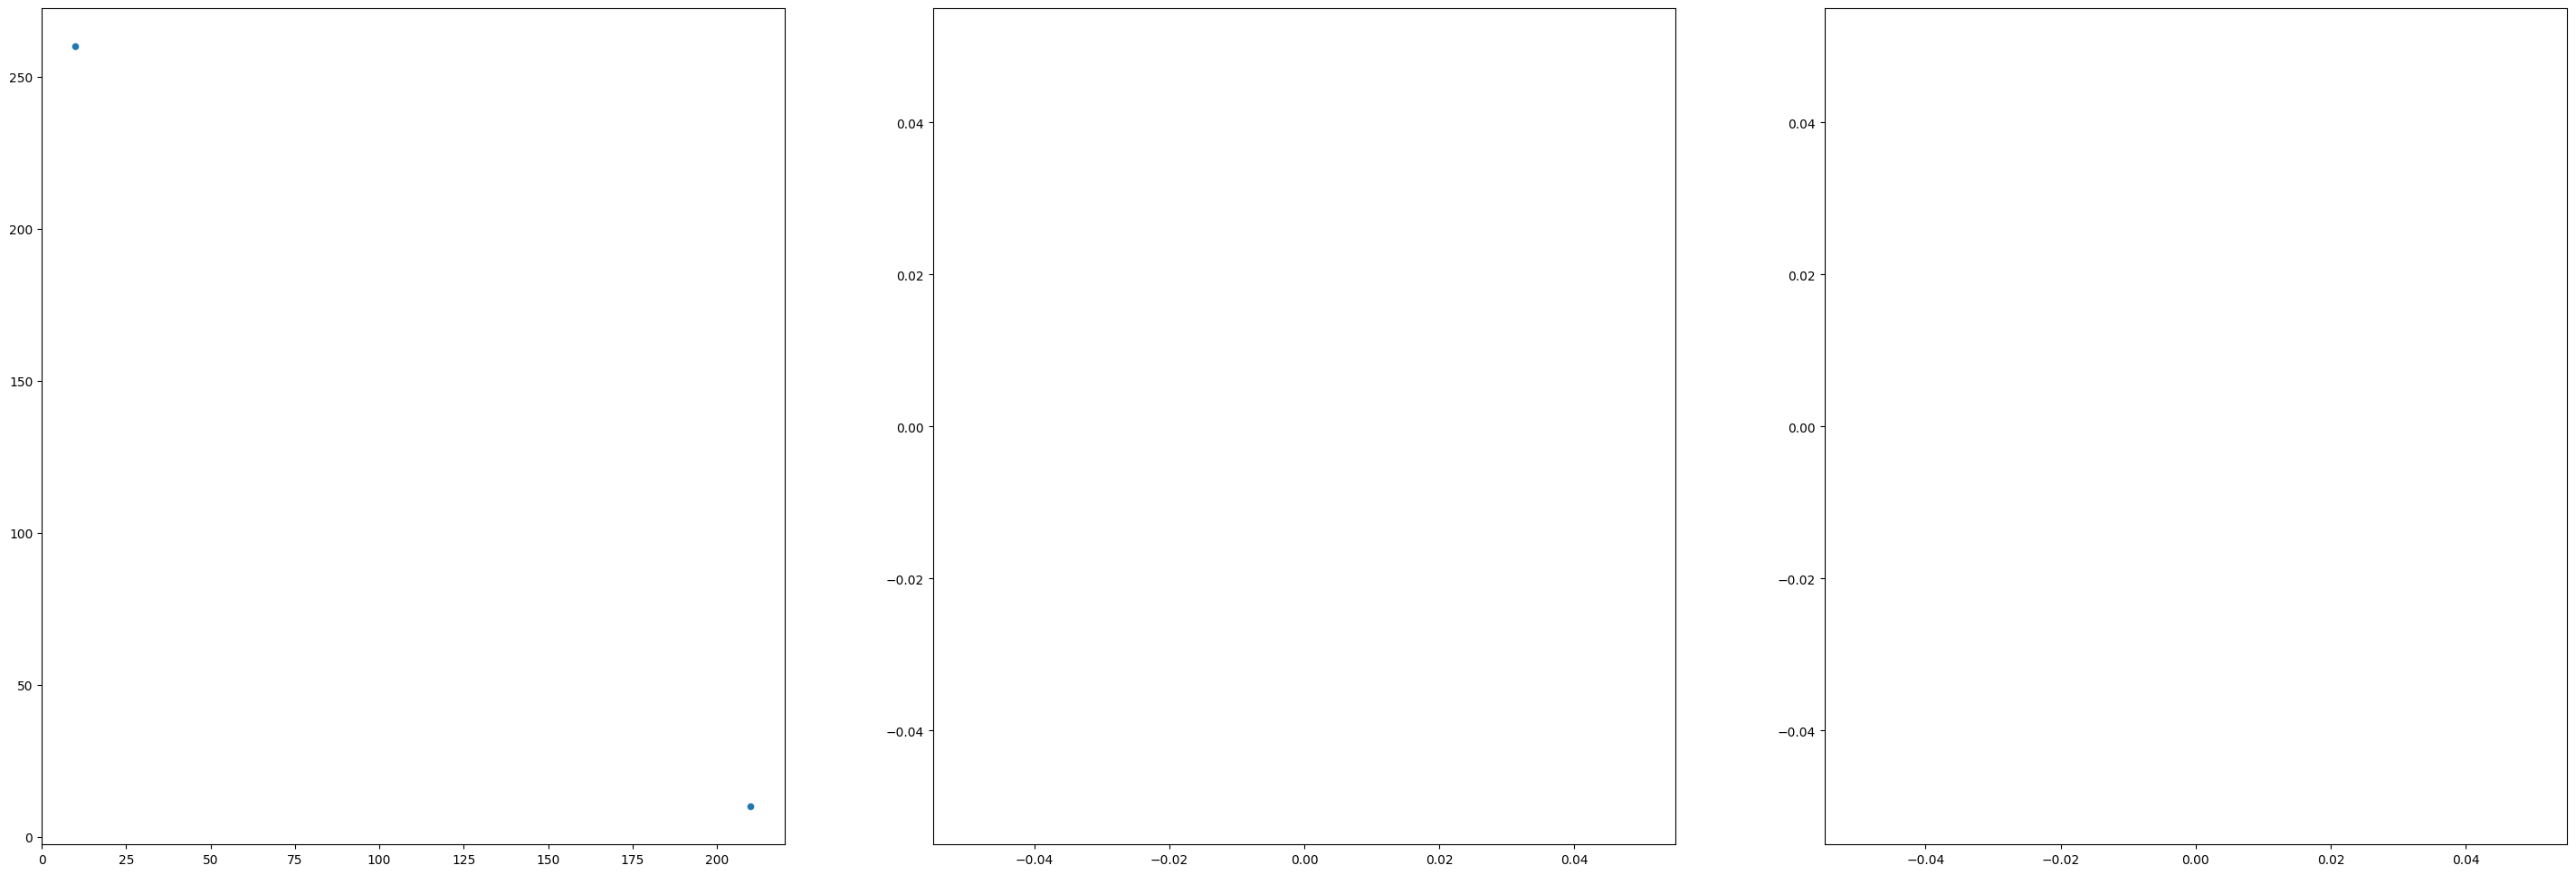

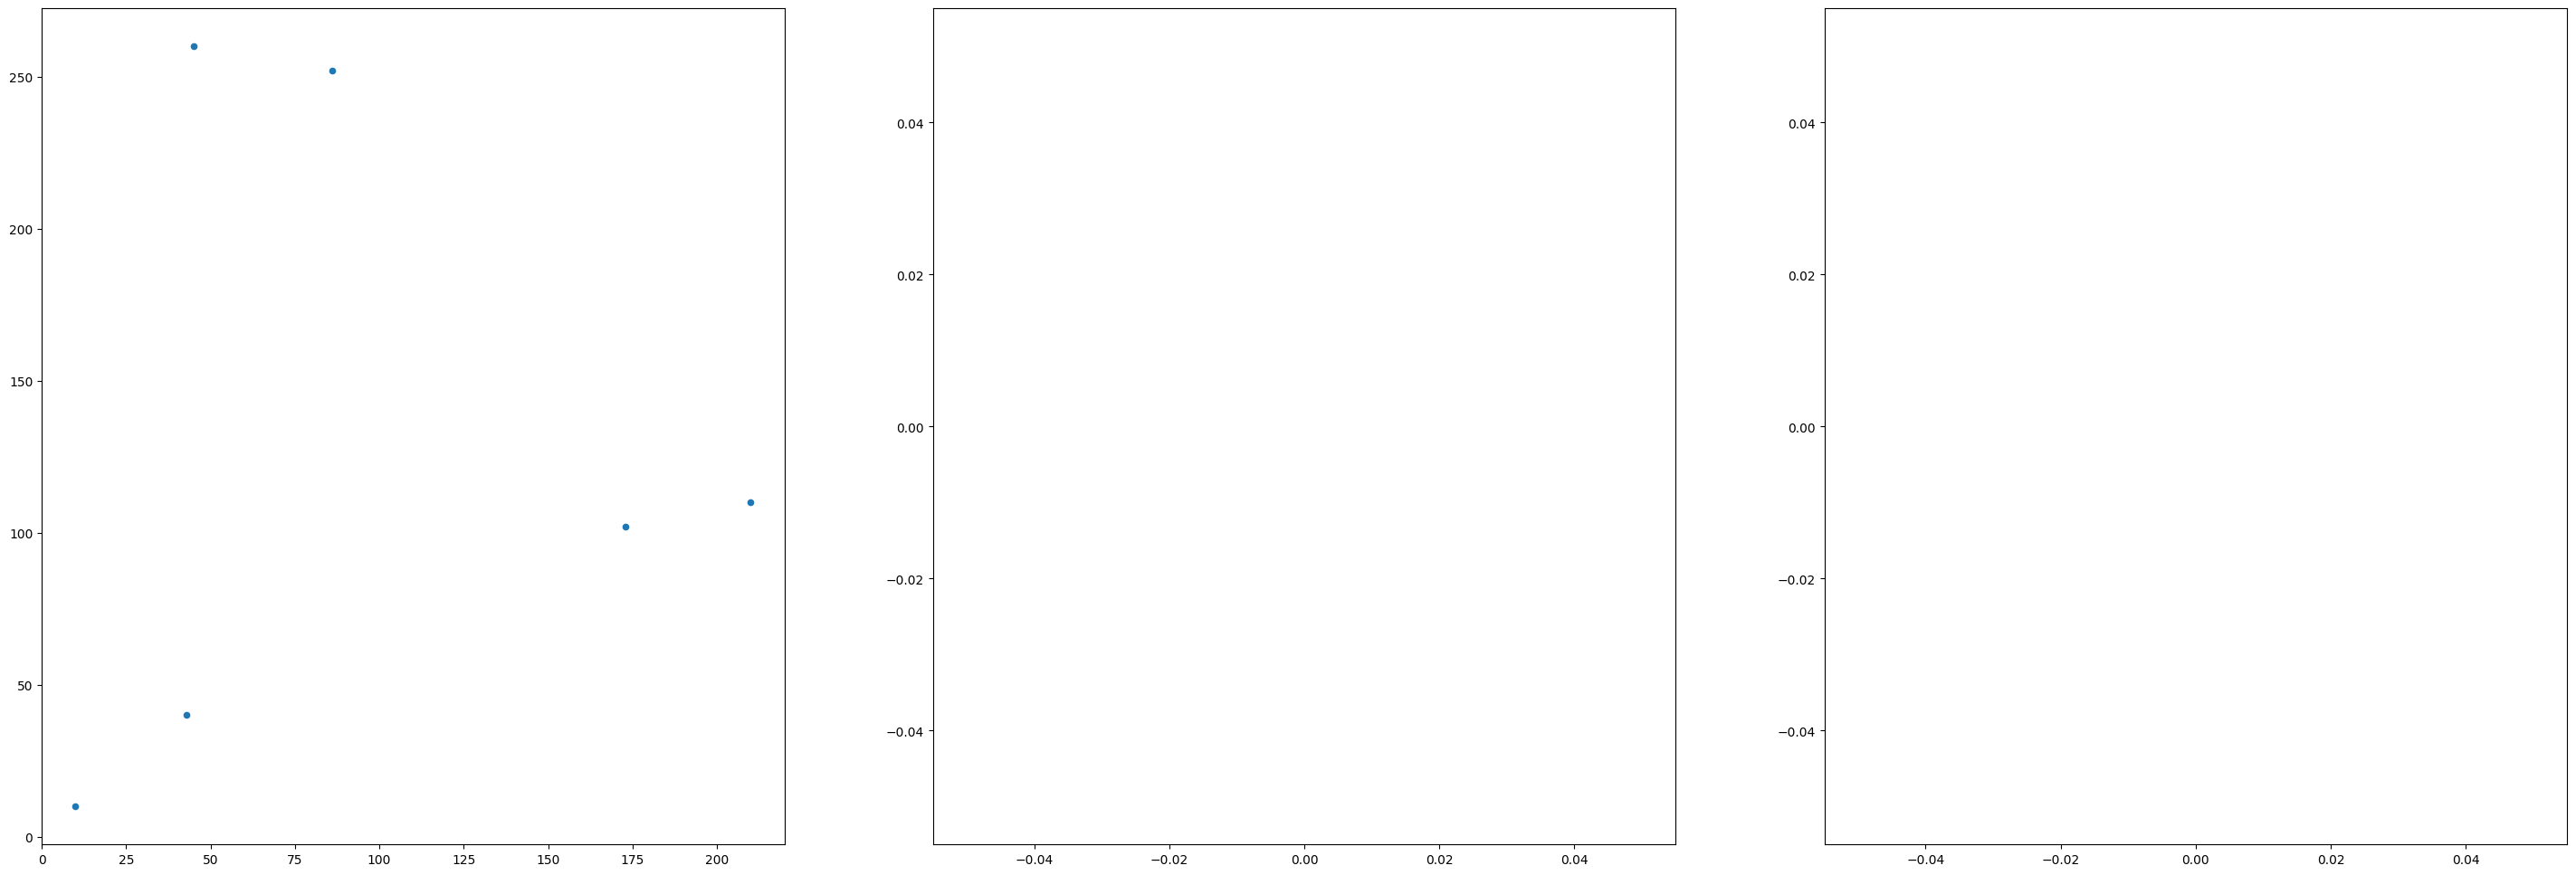

In [29]:
fig, ax = plt.subplots(1,3,figsize=(36,12))
for i, filename in enumerate(data_507[:3]) :
    # row, col = np.where(filename.squeeze())
    # ax[i].scatter(col,row,s=20)
    ax[i].imshow(filename.squeeze(), cmap='viridis',origin='lower')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(36,12))
for i, filename in enumerate(data_672[:3]) :
    # row, col = np.where(filename.squeeze())
    # ax[i].scatter(col,row,s=20)
    ax[i].imshow(filename.squeeze(), cmap='viridis',origin='lower')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(36,12))
for i, filename in enumerate(data_673[:3]) :
    # row, col = np.where(filename.squeeze())
    # ax[i].scatter(col,row,s=20)
    ax[i].imshow(filename.squeeze(), cmap='viridis',origin='lower')
plt.show()

In [27]:
filename.squeeze()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

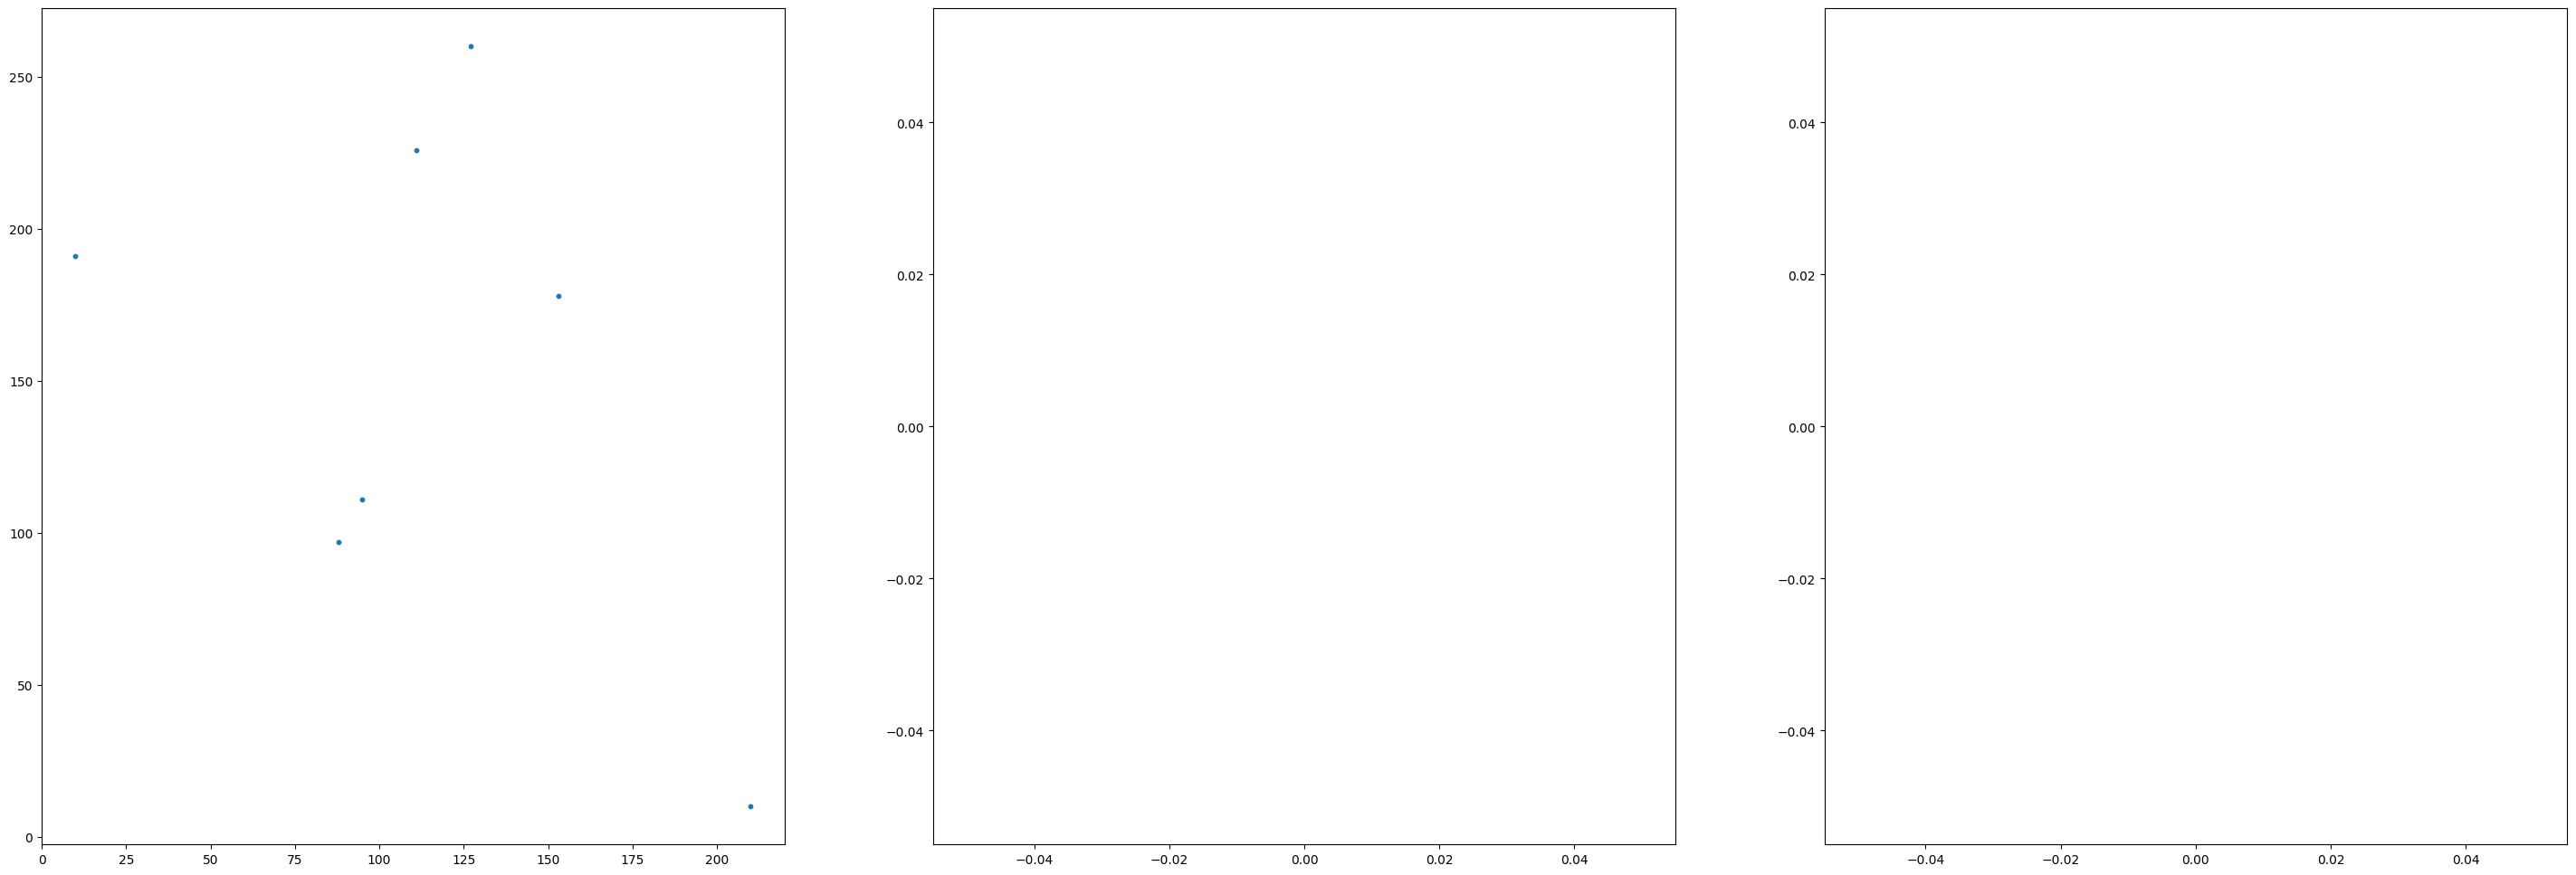

In [28]:
fig, ax = plt.subplots(1,3,figsize=(36,12))
for i, filename in enumerate(dataset_all[:3]) :
    row, col = np.where(filename.squeeze())
    ax[i].scatter(col,row,s=10)
    # ax[i].imshow(filename.squeeze(), cmap='viridis',origin='lower')
plt.show()

In [30]:
import sys
print(sys.getsizeof(new_test.astype(int)))
print(sys.getsizeof(new_test))

475328
59528


<h1>Feed to NN

In [23]:
class GraphAutoencoder(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats):
        super(GraphAutoencoder, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, hidden_feats)
        self.conv2 = dgl.nn.GraphConv(hidden_feats, out_feats)
        self.conv3 = dgl.nn.GraphConv(out_feats, hidden_feats)
        self.conv4 = dgl.nn.GraphConv(hidden_feats, in_feats)

    def forward(self, g, features):
        h = F.relu(self.conv1(g, features))
        h = self.conv2(g, h)
        g.ndata['h'] = h
        h = F.relu(self.conv3(g, h))
        h = self.conv4(g, h)
        return h
    
class AE(nn.Module):
    def __init__(self, input_shape, hidden_shape):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Linear(input_shape,512),
            nn.ReLU(True),
            nn.Linear(512,1024),
            nn.ReLU(True),
            nn.Linear(1024,2048),
            nn.ReLU(True),
            nn.Linear(2048,4096),
            nn.ReLU(True),
            nn.Linear(4096,4096),
            nn.ReLU(True),
            nn.Linear(4096,hidden_shape)
            )

        self.decoder=nn.Sequential(
            nn.Linear(hidden_shape,4096),
            nn.ReLU(True),
            nn.Linear(4096,4096),
            nn.ReLU(True),
            nn.Linear(4096,2048),
            nn.ReLU(True),
            nn.Linear(2048,1024),
            nn.ReLU(True),
            nn.Linear(1024,512),
            nn.ReLU(True),
            nn.Linear(512,input_shape)
            )

    def forward(self,x):
        code = torch.sigmoid(self.encoder(x))
        rep = torch.sigmoid(self.decoder(code))
        return rep, code

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        # conv layer (depth from 33 --> 16), 2x2 kernels
        self.conv1 = nn.Conv2d(33, 16, 2, padding=1)  
        # conv layer (depth from 16 --> 4), 2x2 kernels
        self.conv2 = nn.Conv2d(16, 4, 2, padding=1)
        # pooling layer to reduce x-y dims by two; kernel and stride of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 33, 2, stride=2, padding=1)

    def forward(self, x):
        ## encode ##
        # add hidden layers with relu activation function
        # and maxpooling after
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        # add second hidden layer
        x = F.relu(self.conv2(x))
        x1 = self.pool(x)  # compressed representation
        
        ## decode ##
        # add transpose conv layers, with relu activation function
        x = F.relu(self.t_conv1(x1))
        # output layer (with sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.t_conv2(x))
                
        return x,x1

    
class Conv_Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(1024, 128)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        return x

# Define the decoder network.
class Conv_Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()

        self.fc1 = nn.Linear(128, 1024)
        self.conv1 = nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = x.view(-1, 16, 16, 16)
        x = F.relu(self.conv1(x))
        x = F.sigmoid(self.conv2(x))
        return x

In [24]:
df_151507.shape

(33538, 4226)

In [25]:
data_673.shape

(33538, 1, 270, 220)

In [26]:
# NN take matrix of gene distribution
dataset_active = data_673 #dataset_all, data_507, data_672, data_673
gene_size = 1000 #combined_all.shape[0](com1), combined_all.shape[1](com2), df_{active}.shape[1](com3)
print('Hidden Layer: ',gene_size) 
print('Dataset: ', dataset_active.shape)
print('Label: ', BATCH.shape)

Hidden Layer:  1000
Dataset:  (33538, 1, 270, 220)
Label:  (100614,)


In [27]:
sample_id = 'unfil_151673'

os.environ["CUDA_VISIBLE_DEVICES"]="1"

train_root_path = '/home/spatial_integration/dataset/datapoints/'+sample_id 
test_root_path = '/home/spatial_integration/dataset/datapoints/'+sample_id 
batch_size = 200
epochs = 100
learning_rate = 1e-3
im_size = dataset_active[0].shape
# torch.manual_seed(42)

In [28]:
instance_X_train, instance_X_test = train_test_split(dataset_active, test_size=0.30, random_state=42,shuffle=True) 


train_dataset = TumorDatasetTrain(instance=instance_X_train, root_dir=train_root_path,
                                transform=transforms.Compose([ToTensor()]))
test_dataset = TumorDatasetTest(instance=instance_X_test, root_dir=test_root_path, 
                                transform=transforms.Compose([ToTensor()]))
all_dataset = TumorDatasetAll(instance=dataset_all, root_dir=train_root_path,
                                transform=transforms.Compose([ToTensor()]))

dataloader_all = DataLoader(all_dataset, batch_size=batch_size, shuffle=False, num_workers=1)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

running_loss = []
running_vloss = []

In [29]:
now = datetime.now()
cur_time = now.strftime("%Y-%m-%d_%H:%M:%S")

In [30]:
model_path1 = "weights/dat673_2023-08-22_01.pth"
save = True
pret = False

In [31]:
if os.path.exists(model_path1):
    print("File exists!")
else:
    print("saving to: '{}'".format(model_path1))

saving to: 'weights/dat673_2023-08-22_01.pth'


In [32]:
size = list(im_size)
print(size)
print(np.prod(size))

[1, 270, 220]
59400


In [33]:
device = torch.device("cuda")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
# model = ConvAutoencoder().to(device)
model = AE(input_shape=np.prod(size), hidden_shape=gene_size).to(device)
model.double()

AE(
  (encoder): Sequential(
    (0): Linear(in_features=59400, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1024, out_features=2048, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=2048, out_features=4096, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=4096, out_features=4096, bias=True)
    (9): ReLU(inplace=True)
    (10): Linear(in_features=4096, out_features=1000, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=1000, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=4096, out_features=2048, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=2048, out_features=1024, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=1024, out_features=512

In [34]:
#  use gpu if available
start_time1 = time.time()

# device = torch.device("cuda")

# # create a model from `AE` autoencoder class
# # load it to the specified device, either gpu or cpu
# # model = ConvAutoencoder().to(device)
# model = AE(input_shape=np.prod(size), hidden_shape=gene_size).to(device)
# model.double()

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()
running_loss = []
running_vloss = []

#     Auto Encoder Training
if (not os.path.exists(model_path1) or not pret):
    print('Training AE')
    for epoch in range(epochs):
        start_time = time.time()
        loss = 0
        vloss = 0
        model.train()
        for batch_ndx, batch_features in enumerate(dataloader_train):
            # reshape mini-batch data to [N, 784] matrix
            # load it to the active device
    #             batch_features = Variable(batch_features['image']).to(device)
    #             batch_features = batch_features.type(torch.cuda.FloatTensor)
            images = Variable(batch_features['image']).view(-1,np.prod(size)).to(device)
            images = images.double()
    #             images = images.type(torch.cuda.FloatTensor)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            optimizer.zero_grad()

            # compute reconstructions
            outputs, coded = model(images)
#             print('size', outputs.size(), coded.size())
    #             encoder_only_nosig = model.encoder(images)
    #             encoder_only = torch.sigmoid(model.encoder(images))
            # compute training reconstruction loss
            train_loss = criterion(outputs, images)

            # compute accumulated gradients
            train_loss.backward()

            # perform parameter update based on current gradients
            optimizer.step()
            # add the mini-batch training loss to epoch loss
            loss += train_loss.item()

        # compute the epoch training loss
        loss = loss / len(dataloader_train)
        running_loss.append(loss)
        # display the epoch training loss
        #if(epoch % 5 == 0):
    #       ------------------------------------------------------------------------  
        model.eval()
        with torch.no_grad():
            for batch_ndx, batch_features in enumerate(dataloader_test):
                # reshape mini-batch data to [N, 784] matrix
                # load it to the active device
    #             batch_features = Variable(batch_features['image']).to(device)
    #             batch_features = batch_features.type(torch.cuda.FloatTensor)
                images = Variable(batch_features['image']).view(-1,np.prod(size)).to(device)
                images = images.double()
    #                 images = images.type(torch.cuda.FloatTensor)
                # reset the gradients back to zero
                # PyTorch accumulates gradients on subsequent backward passes
                # optimizer.zero_grad()

                # compute reconstructions
                outputs, coded = model(images)
    #             encoder_only_nosig = model.encoder(images)
    #             encoder_only = torch.sigmoid(model.encoder(images))
                # compute training reconstruction loss
                valid_loss = criterion(outputs, images)

                # perform parameter update based on current gradients
    #                 optimizer.step()
                # add the mini-batch training loss to epoch loss
                vloss += valid_loss.item()

            # compute the epoch training loss
            vloss = vloss / len(dataloader_test)
            running_vloss.append(vloss)

    #     -----------------------------------------------------------------------------
        current_time = time.time()
        elapsed_time = current_time - start_time
        print("epoch : {}/{}, recon loss = {:.8f}, valid loss = {:.8f}, time = {:.2f}s".format(epoch + 1, epochs, loss, vloss, elapsed_time))


        if (epoch > 3) and (abs(running_vloss[epoch] - running_vloss[epoch-1]) <= 0.0001) and (abs(running_vloss[epoch - 1] - running_vloss[epoch - 2]) <= 0.0001):
            print('satisfied early stop')
            break
    if save:
        torch.save(model.state_dict(), model_path1)
        print('saved to:', model_path1)
else:
    print("loading from file")
    model.load_state_dict(torch.load(model_path1))
    model.eval()
    loss = 0
    vloss = 0
    with torch.no_grad():
        for batch_ndx, batch_features in enumerate(dataloader_test):
            # reshape mini-batch data to [N, 784] matrix
            # load it to the active device
#             batch_features = Variable(batch_features['image']).to(device)
#             batch_features = batch_features.type(torch.cuda.FloatTensor)
            images = Variable(batch_features['image']).view(-1,np.prod(size)).to(device)
            images = images.double()
#                 images = images.type(torch.cuda.FloatTensor)
            # reset the gradients back to zero
            # PyTorch accumulates gradients on subsequent backward passes
            # optimizer.zero_grad()

            # compute reconstructions
            outputs, coded = model(images)
#             encoder_only_nosig = model.encoder(images)
#             encoder_only = torch.sigmoid(model.encoder(images))
            # compute training reconstruction loss
            valid_loss = criterion(outputs, images)

            # perform parameter update based on current gradients
#                 optimizer.step()
            # add the mini-batch training loss to epoch loss
            vloss += valid_loss.item()

        # compute the epoch training loss
        vloss = vloss / len(dataloader_test)
        running_vloss.append(vloss)

    #     -----------------------------------------------------------------------------
    print("valid loss = {:.8f}".format(vloss))
    
print("--- %s seconds ---" % (time.time() - start_time1))

Training AE
epoch : 1/100, recon loss = 0.24511156, valid loss = 0.15719834, time = 2.29s
epoch : 2/100, recon loss = 0.12838268, valid loss = 0.04800337, time = 0.78s
epoch : 3/100, recon loss = 0.03556219, valid loss = 0.01274376, time = 0.77s
epoch : 4/100, recon loss = 0.00903990, valid loss = 0.00652427, time = 0.78s
epoch : 5/100, recon loss = 0.00769943, valid loss = 0.00351768, time = 0.77s
epoch : 6/100, recon loss = 0.00516308, valid loss = 0.00579373, time = 0.77s
epoch : 7/100, recon loss = 0.00503864, valid loss = 0.00320331, time = 0.78s
epoch : 8/100, recon loss = 0.00308624, valid loss = 0.00350749, time = 0.77s
epoch : 9/100, recon loss = 0.00425001, valid loss = 0.00376281, time = 0.77s
epoch : 10/100, recon loss = 0.00430850, valid loss = 0.00477503, time = 0.78s
epoch : 11/100, recon loss = 0.00509255, valid loss = 0.00284616, time = 0.77s
epoch : 12/100, recon loss = 0.00391172, valid loss = 0.00403481, time = 0.80s
epoch : 13/100, recon loss = 0.00655179, valid lo

saving to: 'Training_loss_673_230822_01.png'


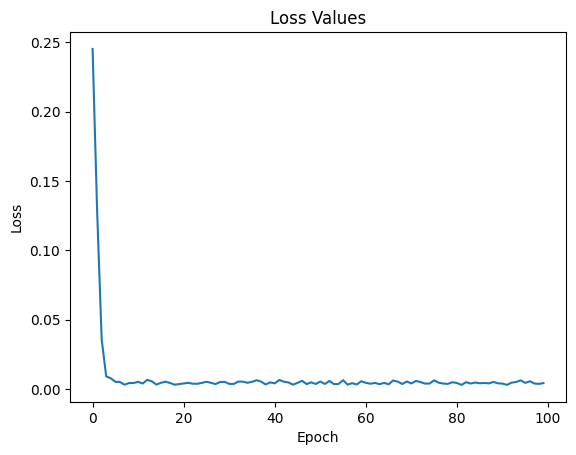

In [35]:
plot_path = 'Training_loss_673_230822_01.png'
if (not pret):
    plt.plot(running_loss)
    
    # Set the title of the plot
    plt.title("Loss Values")
    
    # Set the x-axis label
    plt.xlabel("Epoch")
    
    # Set the y-axis label
    plt.ylabel("Loss")
    
    # save plot
    if os.path.exists(plot_path):
        print("File exists!")
    else:
        print("saving to: '{}'".format(plot_path))
        plt.savefig(plot_path)
    
    # Show the plot
    plt.show()

saving to: 'Validation_loss_673_230822_01.png'


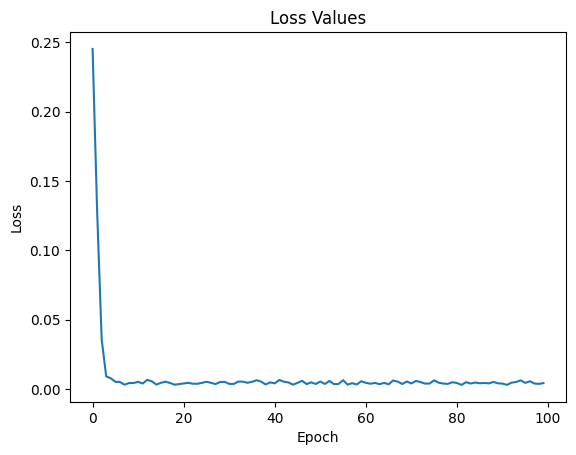

In [36]:
plot_path = 'Validation_loss_673_230822_01.png'
if (not pret):
    plt.plot(running_loss)
    
    # Set the title of the plot
    plt.title("Loss Values")
    
    # Set the x-axis label
    plt.xlabel("Epoch")
    
    # Set the y-axis label
    plt.ylabel("Loss")
    
    # save plot
    if os.path.exists(plot_path):
        print("File exists!")
    else:
        print("saving to: '{}'".format(plot_path))
        plt.savefig(plot_path)
    
    # Show the plot
    plt.show()

In [44]:
run = True
data = dataset_active #data_507, data_672, data_673, dataset_all, dataset_active

# model.load_state_dict(torch.load(model_path1))
model.eval()    


loss = 0
vloss = 0
coded_list = []

if run:
        for instance in tqdm(data):
        
                image = torch.from_numpy(instance)

                with torch.no_grad():
                        # for batch_ndx, batch_features in enumerate(dataloader_all):
                        # reshape mini-batch data to [N, 784] matrix
                        # load it to the active device
                #             batch_features = Variable(batch_features['image']).to(device)
                #             batch_features = batch_features.type(torch.cuda.FloatTensor)
                        images = Variable(image).view(-1,np.prod(size)).to(device)
                        images = images.double()
                #                 images = images.type(torch.cuda.FloatTensor)
                        # reset the gradients back to zero
                        # PyTorch accumulates gradients on subsequent backward passes
                        # optimizer.zero_grad()

                        # compute reconstructions
                        outputs, coded = model(images)
                        coded_list.append(coded)
                #             encoder_only_nosig = model.encoder(images)
                #             encoder_only = torch.sigmoid(model.encoder(images))
                        # compute training reconstruction loss
                        valid_loss = criterion(outputs, images)

                        # perform parameter update based on current gradients
                #                 optimizer.step()
                        # add the mini-batch training loss to epoch loss
                        vloss += valid_loss.item()

        # compute the epoch training loss
        vloss = vloss / len(data)
        running_vloss.append(vloss)
        #     -----------------------------------------------------------------------------
        print("valid loss = {:.8f}".format(vloss))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 33538/33538 [01:11<00:00, 470.59it/s]

valid loss = 0.00302216


In [39]:
run = True
data = dataset_active #data_507, data_672, data_673, dataset_all, dataset_active

# model.load_state_dict(torch.load(model_path1))
model.eval()    


loss = 0
vloss = 0
coded_list = []

if run:
        for instance in tqdm(data):
        
                image = torch.from_numpy(instance)

                with torch.no_grad():
                        # for batch_ndx, batch_features in enumerate(dataloader_all):
                        # reshape mini-batch data to [N, 784] matrix
                        # load it to the active device
                #             batch_features = Variable(batch_features['image']).to(device)
                #             batch_features = batch_features.type(torch.cuda.FloatTensor)
                        images = Variable(image).view(-1,np.prod(size)).to(device)
                        images = images.double()
                #                 images = images.type(torch.cuda.FloatTensor)
                        # reset the gradients back to zero
                        # PyTorch accumulates gradients on subsequent backward passes
                        # optimizer.zero_grad()

                        # compute reconstructions
                        outputs, coded = model(images)
                        coded_list.append(coded)
                #             encoder_only_nosig = model.encoder(images)
                #             encoder_only = torch.sigmoid(model.encoder(images))
                        # compute training reconstruction loss
                        valid_loss = criterion(outputs, images)

                        # perform parameter update based on current gradients
                #                 optimizer.step()
                        # add the mini-batch training loss to epoch loss
                        vloss += valid_loss.item()

        # compute the epoch training loss
        vloss = vloss / len(data)
        running_vloss.append(vloss)
        #     -----------------------------------------------------------------------------
        print("valid loss = {:.8f}".format(vloss))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 33538/33538 [01:11<00:00, 469.31it/s]

valid loss = 0.00354289


In [37]:
run = True
data = dataset_active #data_507, data_672, data_673, dataset_all, dataset_active

# model.load_state_dict(torch.load(model_path1))
model.eval()    


loss = 0
vloss = 0
coded_list = []

if run:
        for instance in tqdm(data):
        
                image = torch.from_numpy(instance)

                with torch.no_grad():
                        # for batch_ndx, batch_features in enumerate(dataloader_all):
                        # reshape mini-batch data to [N, 784] matrix
                        # load it to the active device
                #             batch_features = Variable(batch_features['image']).to(device)
                #             batch_features = batch_features.type(torch.cuda.FloatTensor)
                        images = Variable(image).view(-1,np.prod(size)).to(device)
                        images = images.double()
                #                 images = images.type(torch.cuda.FloatTensor)
                        # reset the gradients back to zero
                        # PyTorch accumulates gradients on subsequent backward passes
                        # optimizer.zero_grad()

                        # compute reconstructions
                        outputs, coded = model(images)
                        coded_list.append(coded)
                #             encoder_only_nosig = model.encoder(images)
                #             encoder_only = torch.sigmoid(model.encoder(images))
                        # compute training reconstruction loss
                        valid_loss = criterion(outputs, images)

                        # perform parameter update based on current gradients
                #                 optimizer.step()
                        # add the mini-batch training loss to epoch loss
                        vloss += valid_loss.item()

        # compute the epoch training loss
        vloss = vloss / len(data)
        running_vloss.append(vloss)
        #     -----------------------------------------------------------------------------
        print("valid loss = {:.8f}".format(vloss))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 33538/33538 [01:12<00:00, 463.20it/s]

valid loss = 0.00402569


In [38]:
np_coded_list = np.array([tensor.cpu().numpy() for tensor in coded_list])
np_coded_list.shape

(33538, 1, 4226)

In [40]:
np_coded_list = np.array([tensor.cpu().numpy() for tensor in coded_list])
np_coded_list.shape

(33538, 1, 3639)

In [38]:
np_coded_list = np.array([tensor.cpu().numpy() for tensor in coded_list])
np_coded_list.shape

(33538, 1, 4015)

In [38]:
np_coded_list = np.array([tensor.cpu().numpy() for tensor in coded_list])
np_coded_list.shape

(33538, 1, 1000)

In [39]:
print(np_coded_list.shape)
coded_path = 'dataset/datapoints/com4m_encoded_673_unfil.npy'
if os.path.exists(coded_path):
    print("{} file exists!".format(coded_path))
else:
    print("saving to: '{}'".format(coded_path))
    np.save(coded_path,np_coded_list)


(33538, 1, 1000)
saving to: 'dataset/datapoints/com4m_encoded_673_unfil.npy'


In [40]:
print("a")

a


In [44]:
coded_all.cpu().numpy()

array([[0.5123302 , 0.49262313, 0.50824453, ..., 0.50302137, 0.50108993,
        0.50447564],
       [0.5121361 , 0.49257998, 0.50827556, ..., 0.5030959 , 0.50095513,
        0.50433852],
       [0.5129166 , 0.4925728 , 0.50875393, ..., 0.50316882, 0.50178365,
        0.50464676],
       ...,
       [0.51222473, 0.4926974 , 0.5085071 , ..., 0.50307037, 0.50127857,
        0.50444283],
       [0.51351355, 0.49169263, 0.50941742, ..., 0.50198281, 0.50113547,
        0.50502596],
       [0.51804234, 0.49004454, 0.51321742, ..., 0.50223653, 0.50186079,
        0.50732488]])

: 

In [30]:
dataset_all[:10]

array([[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],


       [[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],


       [[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False

In [60]:
coded.squeeze().cpu().numpy()

array([0.5130231 , 0.49275185, 0.50900661, ..., 0.50318205, 0.50187437,
       0.50493974])

In [37]:
outputs.shape

torch.Size([1, 59400])

In [123]:
coord_list = [[1.2, 3.4], [2.3, 4.5], [3.4, 5.6], [4.5, 6.7]]

# convert the list to a PyTorch tensor
coords = torch.tensor(coord_list)

# reshape the tensor to the required input shape (batch size, number of channels, height, width)
coords = coords.view(1, 1, -1, 2)

In [124]:
coords

tensor([[[[1.2000, 3.4000],
          [2.3000, 4.5000],
          [3.4000, 5.6000],
          [4.5000, 6.7000]]]])

<h1>Run BEER

In [ ]:
# get decoder hidden feature and concatenate with assays

# final matrix includes ~100 extra features of spatial embeddings treated as spots

# BEER should results in a Umap plot, Correlation plot, and no-Batch effect umap